In [172]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt

In [173]:
#read in stock data for CDW
df1 = pd.read_csv(r"C:\Users\ferre\OneDrive\Documents\TimeSeriesProjectData.csv", infer_datetime_format=True)
# Filter data between two dates
df1['datetime'] = pd.to_datetime(df1['datetime'], errors='coerce')
df1 = df1[df1['datetime'].dt.strftime('%H:%M:%S').between('16:00:00','16:00:00')]

# Display
df1.reset_index(drop=True, inplace=True)

In [174]:
df2 = pd.read_csv(r"C:\Users\ferre\Downloads\HistoricalData_1651335104257.csv", infer_datetime_format=True)
df2

,Date,SP500 Close/Last,XLK Close/last
0,6/7/2021,4226.52,138.968323
1,6/8/2021,4227.26,138.978256
2,6/9/2021,4219.55,139.077530
3,6/10/2021,4239.18,140.100006
4,6/11/2021,4247.44,140.933868
...,...,...,...
175,2/14/2022,4401.67,154.554413
176,2/15/2022,4471.07,158.616913
177,2/16/2022,4475.01,158.457214
178,2/17/2022,4380.26,153.715973


In [175]:
df = pd.DataFrame(df1['datetime'])
df['CDW'] = df1['close']
df['SP500'] = df2['SP500 Close/Last']
df['XLK'] = df2['XLK Close/last']
df

,datetime,CDW,SP500,XLK
0,2021-06-07 16:00:00,165.7600,4226.52,138.968323
1,2021-06-08 16:00:00,166.4900,4227.26,138.978256
2,2021-06-09 16:00:00,165.7000,4219.55,139.077530
3,2021-06-10 16:00:00,167.4100,4239.18,140.100006
4,2021-06-11 16:00:00,168.6600,4247.44,140.933868
...,...,...,...,...
175,2022-02-14 16:00:00,176.6000,4401.67,154.554413
176,2022-02-15 16:00:00,183.4100,4471.07,158.616913
177,2022-02-16 16:00:00,184.3600,4475.01,158.457214
178,2022-02-17 16:00:00,182.1475,4380.26,153.715973


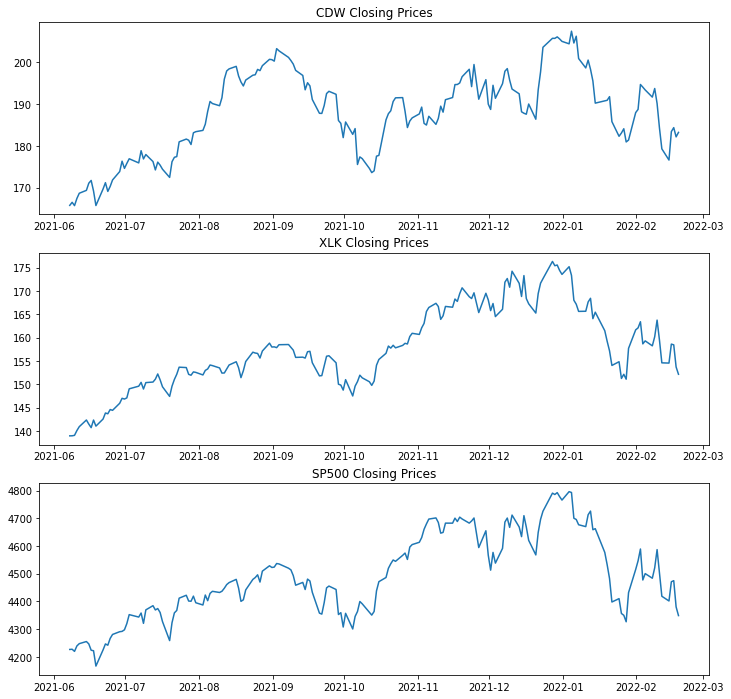

'ALL LINEAR, write ike in homeworks'

In [176]:
'''
1.(3 points) Plot and describe in words each of your data series. As you describe your
plot, this is a good place to talk about frequency, units, trends, possible seasonality,
possible log transformations.
'''
plt.rcParams.update({'figure.figsize':(12,12)})
fig, axs = plt.subplots(3)
axs[0].plot(df['datetime'], df['CDW'])
axs[0].set_title('CDW Closing Prices')
axs[1].plot(df['datetime'],df['XLK'])
axs[1].set_title('XLK Closing Prices')
axs[2].plot(df['datetime'],df['SP500'])
axs[2].set_title('SP500 Closing Prices')
plt.savefig("Final_Plot.png")
plt.show()

'''ALL LINEAR, write ike in homeworks'''




In [177]:
'''2. (2 points) If you transform any of your variables, for example, taking logs, justify
each transformation and plot data after transformation. For example: ”I take logs
because there is an exponential trend in the data. As you can see from my next
Figure, trend becomes linear after the transformation.”
'''

'''There is no need for transforming the data as of now'''

'There is no need for transforming the data as of now'

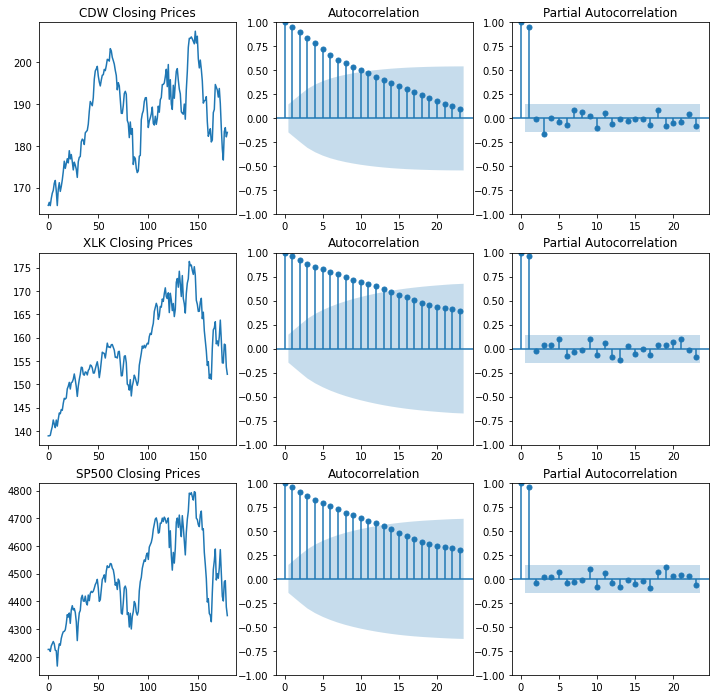

'Write like in homeworks, slow linear decline and one spike of PAC\nSUGGESTING nonstationary'

In [178]:
'''
3. (5 points) For every variable report observational evidence of stationarity, such as
graphs, AC, PACF. Do not transform your data into stationary at this stage.
'''
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(12,12)})

# CDW
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(df['CDW']); axes[0, 0].set_title('CDW Closing Prices')
plot_acf(df['CDW'], ax=axes[0, 1])
plot_pacf(df['CDW'], ax=axes[0, 2])

# XLK
axes[1, 0].plot(df['XLK']); axes[1, 0].set_title('XLK Closing Prices')
plot_acf(df['XLK'], ax=axes[1, 1])
plot_pacf(df['XLK'], ax=axes[1, 2])

# SP500
axes[2, 0].plot(df['SP500']); axes[2, 0].set_title('SP500 Closing Prices')
plot_acf(df['SP500'], ax=axes[2, 1])
plot_pacf(df['SP500'], ax=axes[2, 2])



plt.savefig("Final_Station_Obser.png")
plt.show()


'''Write like in homeworks, slow linear decline and one spike of PAC
SUGGESTING nonstationary'''

In [179]:
'''
4. (15 points) For every variable use unit root tests (with justification of a particular
form of the test and selection of lags). Do not transform your data into stationary
at this stage.
'''

# CDW - Trend
from arch.unitroot import ADF
adf1 = ADF(df['CDW'], lags=8, trend='ct', method='t-stat').regression
adf1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.684
Date:                Mon, 09 May 2022   Prob (F-statistic):             0.0886
Time:                        18:02:19   Log-Likelihood:                -411.91
No. Observations:                 171   AIC:                             845.8
Df Residuals:                     160   BIC:                             880.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0595      0.029     -2.049      0.042      -0.117      -0.002
Diff.L1       -0.0092      0.079     -0.117      0.907      -0.165       0.147
Diff.L2        0.1629      0.078      2.078      0.039       0.008       0.318
Diff.L3       -0.0161      0.079     -0.204      0.838      -0.172       0.139
Diff.L4        0.0433      0.081      0.534      0.594      -0.117       0.203
Diff.L5        0.0989      0.081      1.221      0.224      -0.061       0.259
Diff.L6       -0.0771      0.082     -0.941      0.348      -0.239       0.085
Diff.L7       -0.0917      0.082     -1.118      0.265      -0.254       0.070
Diff.L8       -0.0975      0.082     -1.187      0.237      -0.260       0.065
const         11.3279      5.234      2.164      0.032       0.991      21.664
trend       9.316e-06      0.005      0.002      0.999      -0.011       0.011
==============================================================================
Omnibus:                        1.520   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.175
Skew:                          -0.047   Prob(JB):                        0.556
Kurtosis:                       3.395   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
# XLK - Trend
adf2 = ADF(df['XLK'], lags=8, trend='ct', method='t-stat').regression
adf2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.862
Date:                Mon, 09 May 2022   Prob (F-statistic):             0.0542
Time:                        18:02:19   Log-Likelihood:                -355.42
No. Observations:                 171   AIC:                             732.8
Df Residuals:                     160   BIC:                             767.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0253      0.030     -0.853      0.395      -0.084       0.033
Diff.L1        0.0203      0.080      0.254      0.800      -0.138       0.179
Diff.L2       -0.0172      0.081     -0.212      0.832      -0.177       0.143
Diff.L3       -0.0355      0.081     -0.439      0.661      -0.195       0.124
Diff.L4       -0.2134      0.083     -2.578      0.011      -0.377      -0.050
Diff.L5        0.1131      0.080      1.407      0.161      -0.046       0.272
Diff.L6        0.0611      0.082      0.744      0.458      -0.101       0.223
Diff.L7       -0.0078      0.083     -0.094      0.925      -0.171       0.156
Diff.L8       -0.2008      0.085     -2.365      0.019      -0.368      -0.033
const          4.3208      4.364      0.990      0.324      -4.298      12.940
trend         -0.0026      0.005     -0.523      0.602      -0.013       0.007
==============================================================================
Omnibus:                        4.739   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                6.518
Skew:                           0.020   Prob(JB):                       0.0384
Kurtosis:                       3.956   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
# SP500 - Trend
adf3 = ADF(df['SP500'], lags=8, trend='ct', method='t-stat').regression
adf3.summary()

################

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.665
Date:                Mon, 09 May 2022   Prob (F-statistic):             0.0933
Time:                        18:02:19   Log-Likelihood:                -867.35
No. Observations:                 171   AIC:                             1757.
Df Residuals:                     160   BIC:                             1791.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0348      0.033     -1.063      0.289      -0.099       0.030
Diff.L1        0.0504      0.080      0.630      0.530      -0.108       0.208
Diff.L2        0.0379      0.081      0.469      0.640      -0.122       0.198
Diff.L3       -0.0183      0.081     -0.226      0.822      -0.178       0.142
Diff.L4       -0.1735      0.083     -2.095      0.038      -0.337      -0.010
Diff.L5        0.0547      0.081      0.679      0.498      -0.104       0.214
Diff.L6        0.0914      0.082      1.120      0.264      -0.070       0.253
Diff.L7        0.0195      0.082      0.237      0.813      -0.143       0.182
Diff.L8       -0.2202      0.084     -2.610      0.010      -0.387      -0.054
const        160.4789    141.264      1.136      0.258    -118.503     439.461
trend         -0.0332      0.094     -0.353      0.725      -0.219       0.153
==============================================================================
Omnibus:                        5.964   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.558
Skew:                          -0.397   Prob(JB):                       0.0621
Kurtosis:                       3.387   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
# CDW - Trend
adf1summary = ADF(df['CDW'], lags=2, trend='ct', method='t-stat').summary()
adf1summary

Test Statistic,-2.512
P-value,0.322
Lags,2


In [183]:
# XLK - Trend
adf2summary = ADF(df['XLK'], lags=4, trend='ct', method='t-stat').summary()
adf2summary

Test Statistic,-0.909
P-value,0.955
Lags,4


In [184]:
# SP500 - Trend
adf3summary = ADF(df['SP500'], lags=8, trend='ct', method='t-stat').summary()
adf3summary


Test Statistic,-1.063
P-value,0.935
Lags,8


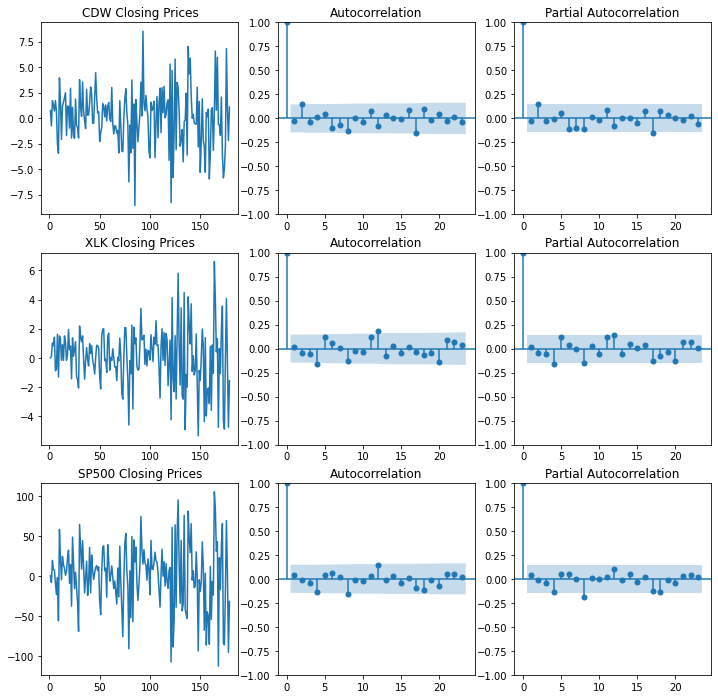

'Write like in Homeworks'

In [185]:
'''5. (5 points) If based on unit root tests you conclude that any variable is, transform
them into stationary. Plot transformed variables. Confirm that the transformed
variables are stationary using observational evidence and unit root tests.'''

plt.rcParams.update({'figure.figsize':(12,12)})

# CDW
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(df['CDW'].diff().dropna()); axes[0, 0].set_title('CDW Closing Prices')
plot_acf(df['CDW'].diff().dropna(), ax=axes[0, 1])
plot_pacf(df['CDW'].diff().dropna(), ax=axes[0, 2])

# CDW volume
axes[1, 0].plot(df['XLK'].diff().dropna()); axes[1, 0].set_title('XLK Closing Prices')
plot_acf(df['XLK'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df['XLK'].diff().dropna(), ax=axes[1, 2])

# SP500
axes[2, 0].plot(df['SP500'].diff().dropna()); axes[2, 0].set_title('SP500 Closing Prices')
plot_acf(df['SP500'].diff().dropna(), ax=axes[2, 1])
plot_pacf(df['SP500'].diff().dropna(), ax=axes[2, 2])



plt.savefig("Final_Station_Diff_Obser.png")
plt.show()

"Write like in Homeworks"

In [186]:
'''......and unit root tests. Continuing the part'''
# CDW - No trend
adf1 = ADF(df['CDW'].diff().dropna(), lags=8, trend='n', method='t-stat').regression
adf1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.548
Model:                            OLS   Adj. R-squared (uncentered):              0.523
Method:                 Least Squares   F-statistic:                              21.67
Date:                Mon, 09 May 2022   Prob (F-statistic):                    1.00e-23
Time:                        18:02:21   Log-Likelihood:                         -412.45
No. Observations:                 170   AIC:                                      842.9
Df Residuals:                     161   BIC:                                      871.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -1.1345      0.227     -4.996      0.000      -1.583      -0.686
Diff.L1        0.0954      0.209      0.457      0.648      -0.317       0.508
Diff.L2        0.2414      0.192      1.260      0.210      -0.137       0.620
Diff.L3        0.2094      0.178      1.179      0.240      -0.141       0.560
Diff.L4        0.2295      0.168      1.368      0.173      -0.102       0.561
Diff.L5        0.3094      0.155      1.992      0.048       0.003       0.616
Diff.L6        0.2152      0.140      1.539      0.126      -0.061       0.491
Diff.L7        0.0970      0.120      0.808      0.420      -0.140       0.334
Diff.L8       -0.0140      0.083     -0.169      0.866      -0.177       0.149
==============================================================================
Omnibus:                        1.893   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.560
Skew:                          -0.095   Prob(JB):                        0.458
Kurtosis:                       3.429   Cond. No.                         13.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
# XLK - No trend
adf2 = ADF(df['XLK'].diff().dropna(), lags=8, trend='n', method='t-stat').regression
adf2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.531
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              20.21
Date:                Mon, 09 May 2022   Prob (F-statistic):                    1.85e-22
Time:                        18:02:21   Log-Likelihood:                         -355.86
No. Observations:                 170   AIC:                                      729.7
Df Residuals:                     161   BIC:                                      758.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -1.1988      0.259     -4.633      0.000      -1.710      -0.688
Diff.L1        0.2297      0.240      0.956      0.340      -0.245       0.704
Diff.L2        0.2115      0.226      0.937      0.350      -0.234       0.657
Diff.L3        0.1728      0.210      0.824      0.411      -0.241       0.587
Diff.L4       -0.0358      0.188     -0.190      0.850      -0.408       0.336
Diff.L5        0.0965      0.160      0.601      0.549      -0.220       0.413
Diff.L6        0.1641      0.141      1.163      0.247      -0.115       0.443
Diff.L7        0.1585      0.120      1.322      0.188      -0.078       0.395
Diff.L8       -0.0358      0.085     -0.420      0.675      -0.204       0.133
==============================================================================
Omnibus:                        5.798   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                7.156
Skew:                          -0.215   Prob(JB):                       0.0279
Kurtosis:                       3.909   Cond. No.                         13.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
# SP500 - No trend
adf3 = ADF(df['SP500'].diff().dropna(), lags=8, trend='n', method='t-stat').regression
adf3.summary()

################

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.519
Model:                            OLS   Adj. R-squared (uncentered):              0.492
Method:                 Least Squares   F-statistic:                              19.32
Date:                Mon, 09 May 2022   Prob (F-statistic):                    1.17e-21
Time:                        18:02:21   Log-Likelihood:                         -863.93
No. Observations:                 170   AIC:                                      1746.
Df Residuals:                     161   BIC:                                      1774.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -1.2242      0.249     -4.925      0.000      -1.715      -0.733
Diff.L1        0.2660      0.230      1.157      0.249      -0.188       0.720
Diff.L2        0.2896      0.216      1.340      0.182      -0.137       0.716
Diff.L3        0.2577      0.200      1.286      0.200      -0.138       0.653
Diff.L4        0.0747      0.179      0.417      0.678      -0.279       0.429
Diff.L5        0.1260      0.154      0.816      0.416      -0.179       0.431
Diff.L6        0.2156      0.137      1.577      0.117      -0.054       0.486
Diff.L7        0.2256      0.118      1.919      0.057      -0.007       0.458
Diff.L8       -0.0023      0.085     -0.027      0.979      -0.169       0.165
==============================================================================
Omnibus:                        9.178   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.130
Skew:                          -0.510   Prob(JB):                       0.0104
Kurtosis:                       3.500   Cond. No.                         12.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
# CDW - No trend
adf1summary = ADF(df['CDW'].diff().dropna(), lags=0, trend='n', method='t-stat').pvalue
adf1summary

9.327775150638277e-25

In [190]:
# XLK - No trend
adf2summary = ADF(df['XLK'].diff().dropna(), lags=0, trend='n', method='t-stat').pvalue
adf2summary

9.21331593333097e-24

In [191]:
# SP500 - No trend
adf3summary = ADF(df['SP500'].diff().dropna(), lags=0, trend='n', method='t-stat').pvalue
adf3summary

2.775214831077567e-23

In [192]:
'''
6. (5 points) Explain how supporting variables affect your main variable. Links between variables should be clear and simple. The direction of the links should be
from the additional variable to the main one. For example: ”GDP helps me to
forecast inflation because during recessions output falls, thus income falls causing
demand to fall. Falling demand pushes down prices and thus inflation.”
'''
'''
SP500 prices helps me to forecast CDW because CDW happens to be
in the sp500 and this index captures the pulse of the American corporate economy.
The two are connected in the sense that all of these stocks tend to move together despite their differences.
'''
'''
XLK prices helps me to forecast CDW because this index seeks to
provide an effective representation of the technology sector of
the S&P 500 Index. To which CDW would fall under that category.
'''

df.corr()

,CDW,SP500,XLK
CDW,1.000000,0.782013,0.766448
SP500,0.782013,1.000000,0.973606
XLK,0.766448,0.973606,1.000000


In [193]:
'''
7. (10 points) Test for exogeneity of your variables using Granger causality tests
'''
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
new_df = df.drop(columns=['datetime'])
grangers_causation_matrix(new_df.diff().dropna(), variables = new_df.columns)
'''
P-Value of 0.0484 at (row 1, column 2) represents the p-value of the
Grangers Causality test for SP500 causing CDW,
which is less that the significance level of 0.05.
So, you can reject the null hypothesis and conclude SP500 causes CDW.

~~~~

P-Value of 0.0482 at (row 1, column 3) represents the p-value of the
Grangers Causality test for XLK causing CDW,
which is less that the significance level of 0.05.
So, you can reject the null hypothesis and conclude XLK causes CDW.

This results says that these two variables affect CDW and CDW affects these
two variables. Since the variables are so connected to each other we may need
VAR for this problem.
'''

'\nP-Value of 0.0484 at (row 1, column 2) represents the p-value of the\nGrangers Causality test for SP500 causing CDW,\nwhich is less that the significance level of 0.05.\nSo, you can reject the null hypothesis and conclude SP500 causes CDW.\n\n~~~~\n\nP-Value of 0.0482 at (row 1, column 3) represents the p-value of the\nGrangers Causality test for XLK causing CDW,\nwhich is less that the significance level of 0.05.\nSo, you can reject the null hypothesis and conclude XLK causes CDW.\n\nThis results says that these two variables affect CDW and CDW affects these\ntwo variables. Since the variables are so connected to each other we may need\nVAR for this problem.\n'

In [194]:
#perform Granger-Causality test
''''''
grangercausalitytests(new_df.diff().dropna()[['CDW', 'SP500']], maxlag=[12])


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.4980  , p=0.1314  , df_denom=142, df_num=12
ssr based chi2 test:   chi2=21.1410 , p=0.0484  , df=12
likelihood ratio test: chi2=19.9060 , p=0.0689  , df=12
parameter F test:         F=1.4980  , p=0.1314  , df_denom=142, df_num=12


{12: ({'ssr_ftest': (1.498012416964821, 0.13135117658521742, 142.0, 12),
   'ssr_chi2test': (21.140963968996488, 0.04835396798853075, 12),
   'lrtest': (19.90601219144446, 0.068884915367042, 12),
   'params_ftest': (1.498012416964822, 0.13135117658521742, 142.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 0., 0., 

In [195]:
grangercausalitytests(new_df.diff().dropna()[['CDW', 'XLK']], maxlag=[12])



Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.4987  , p=0.1311  , df_denom=142, df_num=12
ssr based chi2 test:   chi2=21.1509 , p=0.0482  , df=12
likelihood ratio test: chi2=19.9148 , p=0.0687  , df=12
parameter F test:         F=1.4987  , p=0.1311  , df_denom=142, df_num=12


{12: ({'ssr_ftest': (1.498717374444981, 0.1310890492079266, 142.0, 12),
   'ssr_chi2test': (21.15091280554748, 0.04821376288756304, 12),
   'lrtest': (19.914842866816343, 0.06871409435400284, 12),
   'params_ftest': (1.498717374444981, 0.1310890492079266, 142.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 0., 0., 

In [196]:
#
#
#
# 4 Forecast (30 points)

In [197]:
'''
1. (5 points) Construct a table that summarizes your univariate and multivariate
forecasts. You should have at least 8-10 univariate models and at least 3-5 VARs.
'''
import statsmodels.api as sm

pdq = ((0, 1, 0), (0, 1, 2),
       (0, 1, 3),(1, 1, 6),(1, 1, 7),
       (2, 1, 7), (4, 1, 3),(4, 1, 4))

'''import itertools
p=d=q=range(0,8)
models = list(itertools.product(p,d,q))
pdq = []
for i in models:
    if i[1] == 1:
        pdq.append(i)'''
'''
pdq = list(pdq)


len(pdq)
len(df)'''
pdq

((0, 1, 0),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 7),
 (4, 1, 3),
 (4, 1, 4))

In [198]:
import warnings

'''
Notes for next time working on this:
Table is just of predictions
do the diebold test after you train the model because that will tell you
whihc is the best one
soooo basically:
run the for loop below -> take every forecast from predictionslist and calc
the new loss -> that loss tells you the best one -> take the best one and use
the diebold mariano test for that
But not sure how I use this test for a different loss but somehow
code it into the dm_testing.py
'''
warnings.filterwarnings("ignore")
resids = []
max_abs_roots = [0,0,0]
predictions_list = []
confidence_intervals = []

for param in pdq:
    try:
        model_arima = sm.tsa.arima.ARIMA(df['CDW'], order=param)
        model_arima_fit = model_arima.fit()
        resids.append(model_arima_fit.resid)
        predictions_list.append((model_arima_fit.forecast(steps=10)))

        result_ci = model_arima_fit.get_forecast(steps=10)
        result_ci = result_ci.conf_int(alpha=.05)
        confidence_intervals.append(result_ci.values[-1])

        # We know that arma 0,0 is best
        max_abs_roots.append(max(abs(model_arima_fit.arroots)))
    except:
        continue

#  dm.append(dm_test(X_test,predictions2,model_arima_fit.predict(start=345, end=431),h = 1, crit="RMSE"))

In [199]:
#CI
confidence_intervals

[array([165.97558308, 200.46441692]),
 array([164.04811106, 201.70679415]),
 array([164.81577864, 201.09505785]),
 array([167.60371637, 202.50847075]),
 array([167.67281762, 202.51396299]),
 array([167.60587692, 202.52686745]),
 array([168.00502403, 200.99796806]),
 array([166.36941477, 202.57472578])]

In [200]:
for i,j in confidence_intervals:
    print(i-j)

-34.48883384528807
-37.658683088179714
-36.27927920434456
-34.90475438140493
-34.84114536660388
-34.92099052726354
-32.99294402653857
-36.20531101453889


In [201]:
qstat = []
pvalue = []
for i in range(len(resids)):
    qstat.append(sm.stats.acorr_ljungbox(resids[i].values[1:], return_df=False,lags=[10])[0])
    pvalue.append(sm.stats.acorr_ljungbox(resids[i].values[1:], return_df=False,lags=[10])[1])


In [202]:
for i, j in zip(pdq, predictions_list):
    print(i, "\n", j)

(0, 1, 0) 
 180    183.22
181    183.22
182    183.22
183    183.22
184    183.22
185    183.22
186    183.22
187    183.22
188    183.22
189    183.22
Name: predicted_mean, dtype: float64
(0, 1, 2) 
 180    182.757371
181    182.877453
182    182.877453
183    182.877453
184    182.877453
185    182.877453
186    182.877453
187    182.877453
188    182.877453
189    182.877453
Name: predicted_mean, dtype: float64
(0, 1, 3) 
 180    182.639526
181    183.033038
182    182.955418
183    182.955418
184    182.955418
185    182.955418
186    182.955418
187    182.955418
188    182.955418
189    182.955418
Name: predicted_mean, dtype: float64
(1, 1, 6) 
 180    183.958302
181    185.560330
182    185.374301
183    184.880095
184    185.008784
185    185.026484
186    185.038528
187    185.046723
188    185.052299
189    185.056094
Name: predicted_mean, dtype: float64
(1, 1, 7) 
 180    184.093363
181    185.775113
182    185.803329
183    185.187798
184    185.081878
185    185.116908
186 

In [203]:
df[['CDW', 'SP500', 'XLK']]

,CDW,SP500,XLK
0,165.7600,4226.52,138.968323
1,166.4900,4227.26,138.978256
2,165.7000,4219.55,139.077530
3,167.4100,4239.18,140.100006
4,168.6600,4247.44,140.933868
...,...,...,...
175,176.6000,4401.67,154.554413
176,183.4100,4471.07,158.616913
177,184.3600,4475.01,158.457214
178,182.1475,4380.26,153.715973


In [204]:
'''VAR model'''
'''Select number of lags'''
from statsmodels.tsa.api import VAR
for i in [0,1,2,3,4,5,6,7,8,9,10]:
    model = VAR(df[['CDW', 'SP500', 'XLK']].diff().dropna())
    var_result = model.fit(i)
    print('Order =', i)
    print('AIC: ', var_result.aic)
    print('BIC: ', var_result.bic)

Order = 0
AIC:  8.426119807032133
BIC:  8.47953968087304
Order = 1
AIC:  8.520630852840574
BIC:  8.735133114658018
Order = 2
AIC:  8.56202256897959
BIC:  8.938853893183264
Order = 3
AIC:  8.657967460788514
BIC:  9.198390869033652
Order = 4
AIC:  8.714272567980128
BIC:  9.419567727883084
Order = 5
AIC:  8.770663109101344
BIC:  9.642126639919146
Order = 6
AIC:  8.816099248217503
BIC:  9.855045033687869
Order = 7
AIC:  8.887827049671698
BIC:  10.095586558216395
Order = 8
AIC:  8.865904696303888
BIC:  10.243827308805054
Order = 9
AIC:  8.891030137405195
BIC:  10.440483482771207
Order = 10
AIC:  8.984954685486167
BIC:  10.707324984230816


In [205]:
'''Basically we have white noise model'''

'Basically we have white noise model'

In [206]:
'''
Statistical Observation: Given test’s p-values, I cannot reject the null hypothesis
of White Noise.
'''

'\nStatistical Observation: Given test’s p-values, I cannot reject the null hypothesis\nof White Noise.\n'

In [207]:
'''
I wonder if I can do the white noise test and that is my reasoning
for choosing zero lags like above^
Even tho we have a white noise model, given we are doing VAR, we will do 1 lag
'''
var_result = model.fit(1)
var_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, May, 2022
Time:                     18:02:34
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    8.73513
Nobs:                     178.000    HQIC:                   8.60762
Log likelihood:          -1504.05    FPE:                    5017.33
AIC:                      8.52063    Det(Omega_mle):         4693.74
--------------------------------------------------------------------
Results for equation CDW
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.085304         0.210615            0.405           0.685
L1.CDW          -0.078211         0.096288           -0.812           0.417
L1.SP500        -0.004312         0.015062           -0.286           0.775
L1.XLK

In [208]:
lag_order = var_result.k_ar
print(lag_order)
# Input data for forecasting
forecast_input = df[['CDW', 'SP500', 'XLK']].diff().values[-lag_order:]
forecast_input

1


array([[  1.0725  , -31.39    ,  -1.557129]])

In [209]:
'''Confidene Interval of VAR'''
var_ci = var_result.forecast_interval(y=forecast_input, steps=10)
var_ci_cdw = pd.DataFrame(var_ci[0], index=df.index[-10:], columns=['Point_1d', 'Lower_1d', 'Upper_1d'])
var_ci_cdw

,Point_1d,Lower_1d,Upper_1d
170,-0.231766,-4.691362,-0.118403
171,0.095636,0.709068,0.079808
172,0.093656,0.667857,0.073359
173,0.092462,0.658540,0.073216
174,0.092562,0.659996,0.073280
175,0.092563,0.659985,0.073278
176,0.092562,0.659979,0.073278
177,0.092562,0.659979,0.073278
178,0.092562,0.659979,0.073278
179,0.092562,0.659979,0.073278


In [210]:
# Forecast
pred = var_result.forecast(y=forecast_input, steps=10)
pred = pd.DataFrame(pred, index=df.index[-10:], columns=df[['CDW', 'SP500', 'XLK']].columns + '_1d')
pred

,CDW_1d,SP500_1d,XLK_1d
170,-0.231766,-4.691362,-0.118403
171,0.095636,0.709068,0.079808
172,0.093656,0.667857,0.073359
173,0.092462,0.658540,0.073216
174,0.092562,0.659996,0.073280
175,0.092563,0.659985,0.073278
176,0.092562,0.659979,0.073278
177,0.092562,0.659979,0.073278
178,0.092562,0.659979,0.073278
179,0.092562,0.659979,0.073278


In [211]:
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df[['CDW', 'SP500', 'XLK']], pred)

In [212]:
#results for CDW equations for VAR
''''''
df_results['CDW_forecast'].values[-1]


183.82536124694107

In [213]:
def brianLoss(current_price, ten_day_price, forecast_price):
    d1 = None
    d2 = None
    if forecast_price >= ((current_price * .01) + current_price):
        d1 = 1
    elif forecast_price <= ((current_price * .01) + current_price):
        d1 = 0
    if ten_day_price > current_price:
        d2 = 1
    elif ten_day_price < current_price:
        d2 = 0

    loss = (-d1 * ((ten_day_price - current_price) * np.floor(1000 / current_price))) \
           + (1 - d1) * (d2 * ((ten_day_price - current_price) * np.floor(1000 / current_price)) - .50)
    return round(loss,4)

brianLoss(current_price=181,ten_day_price=184,forecast_price=183)

-15.0

In [214]:
# come back to this, this should be -.50
p_forecast_10 = []
L = []
for i in predictions_list:
    p_forecast_10.append(i.values[-1])

# Add VAR forecast
#p_forecast_10.append()
for i in p_forecast_10:
    L.append(brianLoss(current_price=183.22,ten_day_price=165.44,forecast_price=i))
L

[-0.5, -0.5, -0.5, 88.9, 88.9, 88.9, -0.5, -0.5]

In [215]:
# Calculate loss

In [216]:
full = pd.DataFrame()
full['Model'] = pdq
full['Residuals’Q-stat'] = qstat
full['Q-stat p-value'] = pvalue
full['Modulus of Highest Root'] = max_abs_roots
full['10th Day Forecast'] = p_forecast_10
full['Loss'] = L

#full[' Diebold-Mariano'] = dm
#full['Brian Loss'] = brianLoss() for i[-1] in list - last item in every i

full

,Model,Residuals’Q-stat,Q-stat p-value,Modulus of Highest Root,10th Day Forecast,Loss
0,"(0, 1, 0)",[11.053974000525233],[0.35332842428620903],0.000000,183.220000,-0.5
1,"(0, 1, 2)",[6.4017250315809155],[0.7804588866717428],0.000000,182.877453,-0.5
2,"(0, 1, 3)",[5.544645552629775],[0.851960726506938],0.000000,182.955418,-0.5
3,"(1, 1, 6)",[1.4251730032503698],[0.999150057396655],1.469638,185.056094,88.9
4,"(1, 1, 7)",[1.0479003396353084],[0.9997867629633403],1.720673,185.093390,88.9
5,"(2, 1, 7)",[1.2863259048910967],[0.9994611066956776],1.437988,185.066372,88.9
6,"(4, 1, 3)",[8.090715589914192],[0.6199762825347312],38.255950,184.501496,-0.5
7,"(4, 1, 4)",[5.018235869369888],[0.8899565182209617],1.052159,184.472070,-0.5


<AxesSubplot:>

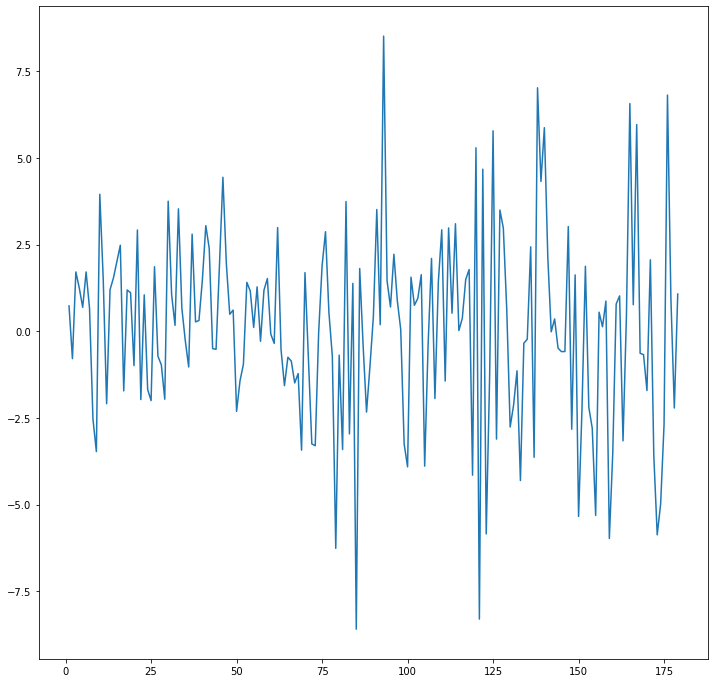

In [217]:
resids[0][1:].plot() # this comes in handy when choose best model to visualize
# so wait on it

In [218]:
'''
2. (5 points) Choose your best forecasting model based on YOUR loss function (DO
NOT USE AIC, BIC, MAFE or anything else) and other relevant considerations
(like residuals diagnostics, simplicity and so on).
'''

'\n2. (5 points) Choose your best forecasting model based on YOUR loss function (DO\nNOT USE AIC, BIC, MAFE or anything else) and other relevant considerations\n(like residuals diagnostics, simplicity and so on).\n'

In [219]:
'''
3. (5 points) Test if your best model is statistically better than your other forecasting
models.
'''
#This is the diebold test
# need the loss function to be approved before this
# because I need that for this test
from dm_testing import *
dm = []

real_values = [177.990005, 169.100006, 171.300003, 177.529999,
               172.460007, 169.410004, 174.020004, 174.350006,
               171.570007, 165.44]

for param in pdq:
    try:
        model_arima = sm.tsa.arima.ARIMA(df['CDW'], order=param)
        model_arima_fit = model_arima.fit()
        dm.append(dm_test(real_values,predictions_list[0],model_arima_fit.forecast(steps=10),h = 1, crit="RMSE"))
    except:
        continue
dm

[dm_return(DM=nan, p_value=nan),
 dm_return(DM=29.53, p_value=0.0),
 dm_return(DM=8.65, p_value=0.0),
 dm_return(DM=-13.5, p_value=0.0),
 dm_return(DM=-13.07, p_value=0.0),
 dm_return(DM=-13.82, p_value=0.0),
 dm_return(DM=-4.45, p_value=0.0016),
 dm_return(DM=-3.53, p_value=0.0064)]

In [99]:
full['Diebold-Mariano'] = dm
full

,Model,Residuals’Q-stat,Q-stat p-value,Modulus of Highest Root,10th Day Forecast,Loss,Diebold-Mariano
0,"(0, 1, 0)",[11.053974000525233],[0.35332842428620903],0.000000,183.220000,-0.5,"(nan, nan)"
1,"(0, 1, 2)",[6.4017250315809155],[0.7804588866717428],0.000000,182.877453,-0.5,"(29.53, 0.0)"
2,"(0, 1, 3)",[5.544645552629775],[0.851960726506938],0.000000,182.955418,-0.5,"(8.65, 0.0)"
3,"(1, 1, 6)",[1.4251730032503698],[0.999150057396655],1.469638,185.056094,88.9,"(-13.5, 0.0)"
4,"(1, 1, 7)",[1.0479003396353084],[0.9997867629633403],1.720673,185.093390,88.9,"(-13.07, 0.0)"
5,"(2, 1, 7)",[1.2863259048910967],[0.9994611066956776],1.437988,185.066372,88.9,"(-13.82, 0.0)"
6,"(4, 1, 3)",[8.090715589914192],[0.6199762825347312],38.255950,184.501496,-0.5,"(-4.45, 0.0016)"
7,"(4, 1, 4)",[5.018235869369888],[0.8899565182209617],1.052159,184.472070,-0.5,"(-3.53, 0.0064)"


In [100]:
# Append new row to table to include the VAR
# Loss for VAR
var_Loss = brianLoss(current_price=183.22,ten_day_price=165.44,forecast_price=df_results['CDW_forecast'].values[-1])

#VAR resids
var_resid = var_result.resid['CDW']

#var_result.arroots
var_roots = max(abs(var_result.roots))
# qstat and p value for VAR
var_q = sm.stats.acorr_ljungbox(var_resid, return_df=False,lags=[10])[0]
var_p = sm.stats.acorr_ljungbox(var_resid, return_df=False,lags=[10])[1]
#dm test for VAR
var_dm = dm_test(real_values,predictions_list[0],df_results['CDW_forecast'].values,h = 1, crit="RMSE")

In [101]:
full.loc[len(df.index)] = ["VAR",var_q, var_p, var_roots,
             df_results['CDW_forecast'].values[-1], var_Loss,var_dm]
full

,Model,Residuals’Q-stat,Q-stat p-value,Modulus of Highest Root,10th Day Forecast,Loss,Diebold-Mariano
0,"(0, 1, 0)",[11.053974000525233],[0.35332842428620903],0.000000,183.220000,-0.5,"(nan, nan)"
1,"(0, 1, 2)",[6.4017250315809155],[0.7804588866717428],0.000000,182.877453,-0.5,"(29.53, 0.0)"
2,"(0, 1, 3)",[5.544645552629775],[0.851960726506938],0.000000,182.955418,-0.5,"(8.65, 0.0)"
3,"(1, 1, 6)",[1.4251730032503698],[0.999150057396655],1.469638,185.056094,88.9,"(-13.5, 0.0)"
4,"(1, 1, 7)",[1.0479003396353084],[0.9997867629633403],1.720673,185.093390,88.9,"(-13.07, 0.0)"
5,"(2, 1, 7)",[1.2863259048910967],[0.9994611066956776],1.437988,185.066372,88.9,"(-13.82, 0.0)"
6,"(4, 1, 3)",[8.090715589914192],[0.6199762825347312],38.255950,184.501496,-0.5,"(-4.45, 0.0016)"
7,"(4, 1, 4)",[5.018235869369888],[0.8899565182209617],1.052159,184.472070,-0.5,"(-3.53, 0.0064)"
180,VAR,[11.122729591693087],[0.34803656043683945],25.189964,183.825361,-0.5,"(-2.12, 0.063)"


In [102]:
'''
4. (5 points) Compute prediction interval based on your best model. Don’t forget
that your forecast is not a single number but a 95% probability interval.
'''
'''Below'''

'Below'

In [142]:
'''
5. (5 points) Compute prediction interval for ARMA(0,0) and compare your best
model interval to ARMA(0,0) interval. Make observation, how much did your best
model shrunk the interval?
'''
best_arima_model = sm.tsa.arima.ARIMA(df['CDW'], order=(0, 1, 0))
# fit/estimate models
best_model_arima_fit = best_arima_model.fit()
result1 = best_model_arima_fit.get_forecast(steps=10)
ci1 = result1.conf_int(alpha=.05)

# compare to other one
arima_model = sm.tsa.arima.ARIMA(df['CDW'], order=(1, 1, 7))
# fit/estimate models
model_arima_fit = arima_model.fit()
result2 = model_arima_fit.get_forecast(steps=10)
ci2 = result2.conf_int(alpha=.05)
'''
My best model was ARMA(0,0) so I will compare that to another similarly scored model
The ARMA(0,0) does shrink the CI

'''
print(ci1.values[:,0])
print(ci1.values[-1])
print(ci2.values[-1])

[177.76683656 175.50806231 173.77484386 172.31367312 171.02635586
 169.86253209 168.79228568 167.79612461 166.86050968 165.97558308]
[165.97558308 200.46441692]
[167.67281762 202.51396299]


In [125]:
print(best_model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    CDW   No. Observations:                  180
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -437.155
Date:                Mon, 09 May 2022   AIC                            876.310
Time:                        10:17:54   BIC                            879.498
Sample:                             0   HQIC                           877.603
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.7411      0.697     11.104      0.000       6.375       9.107
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 5.01
Prob(Q):                              0.72   Pr

In [108]:
'''
6. (5 points) Use your loss function to convert your forecast interval into loss interval.
'''
index = pd.Index(range(180, 190))
real_values = pd.DataFrame(real_values, index=index)
real_values

,0
180,177.990005
181,169.100006
182,171.300003
183,177.529999
184,172.460007
185,169.410004
186,174.020004
187,174.350006
188,171.570007
189,165.440000


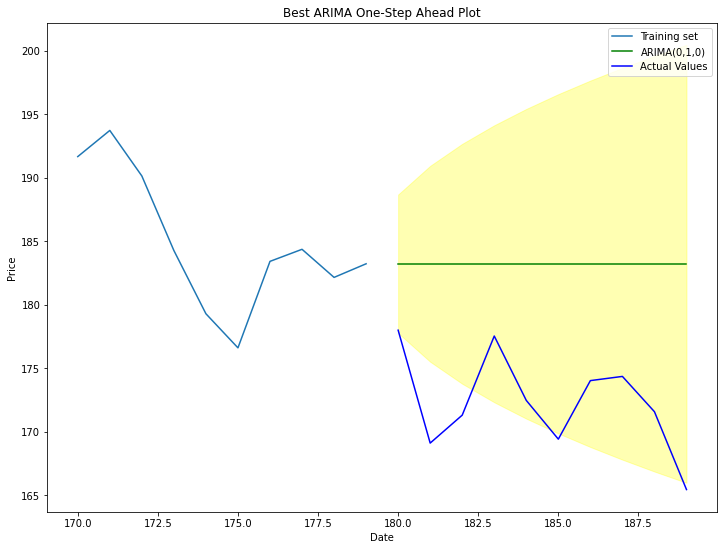

In [143]:
# Might not inlcude this
plt.rcParams.update({'figure.figsize':(12,9)})
plt.plot(df.CDW[-10:], scalex=True)
plt.plot(predictions_list[0],color='green',scalex=True)
plt.plot(real_values,color='blue',)

plt.fill_between(range(180,190), ci1.values[:,0],  ci1.values[:,1], alpha=.3, color='yellow')

plt.title("Best ARIMA One-Step Ahead Plot")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['Training set','ARIMA(0,1,0)', 'Actual Values'])
plt.savefig("best_arima_CI")

In [512]:
print(real_values)
ci1.values


              0
181  169.100006
182  171.300003
183  177.529999
184  172.460007
185  169.410004
186  174.020004
187  174.350006
188  171.570007
189  165.440000


array([[177.76683656, 188.67316344],
       [175.50806231, 190.93193769],
       [173.77484386, 192.66515614],
       [172.31367312, 194.12632688],
       [171.02635586, 195.41364414],
       [169.86253209, 196.57746791],
       [168.79228568, 197.64771432],
       [167.79612461, 198.64387539],
       [166.86050968, 199.57949032],
       [165.97558308, 200.46441692]])

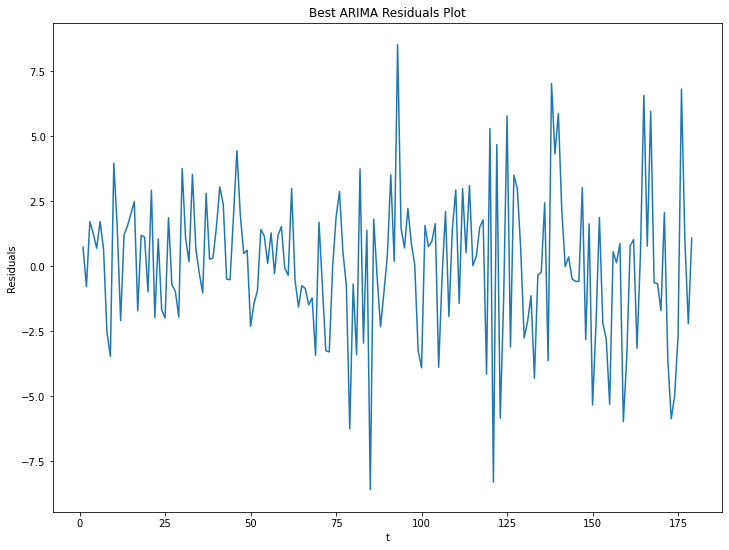

In [127]:
plt.rcParams.update({'figure.figsize':(12,9)})
plt.plot(resids[0][1:])
plt.title("Best ARIMA Residuals Plot")
plt.xlabel("t")
plt.ylabel("Residuals")
plt.savefig("best_arma_residual_values")

In [146]:
print(real_values)
print(ci1.values)

              0
180  177.990005
181  169.100006
182  171.300003
183  177.529999
184  172.460007
185  169.410004
186  174.020004
187  174.350006
188  171.570007
189  165.440000
[[177.76683656 188.67316344]
 [175.50806231 190.93193769]
 [173.77484386 192.66515614]
 [172.31367312 194.12632688]
 [171.02635586 195.41364414]
 [169.86253209 196.57746791]
 [168.79228568 197.64771432]
 [167.79612461 198.64387539]
 [166.86050968 199.57949032]
 [165.97558308 200.46441692]]


In [138]:
for i in resids:
    print(i[1:].mean())

0.09754189944137306
0.08467562905975705
0.08940261482947433
0.1289482254889438
0.12814658783340663
0.1292822949745205
0.15554539913764542
0.09353657385920729
